In [57]:
import pandas as pd 
from importlib.resources import path
import re
import pprint
import os
from numpy import size
path="/home/longin/dissertation/dataset/Data"
os.chdir(path)


In [58]:
## function for reading txt data.
def readfile(file_path):

    fileObject = open(file_path, 'r',encoding='cp1250')
    data = fileObject.read()
    portern='Respondent(.+)'
    result=re.findall(portern,data)
    # comvert list to string 
    dataset=' '.join(str(item) for item in result)
    return dataset




In [59]:
# iterate through all file
dataset=""
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        file_path = f"{path}/{file}"
  
        # call read text file function
        file_name = os.path.basename(file_path)
        #print(os.path.splitext(file_name)[0])
        transcritdata=readfile(file_path)
        dataset=dataset+transcritdata

# data cleaning 
removing uneccesary charactors lile "": and () even reading spaces


In [60]:
def datasetclening(text):
    """
        This function is removing unnecessary characters  
    """
    Char_repacede_by_space = re.compile(':') # charactor replaces by space
    Char_prathesis = re.compile('[()]') # charactor replaces by space
    remove_readinf_space=re.compile('\s\s+') # removing reading space
    text = text.lower() # lowercase text
    text = Char_repacede_by_space.sub(' ', text)# remove spacial charactors
    text = Char_prathesis.sub(' ', text)# remove prathesis 
    text= remove_readinf_space.sub('', text) # removing reading space
    #text.lstrip() # remove reading space
    

    #text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

<>:7: DeprecationWarning: invalid escape sequence '\s'
<>:7: DeprecationWarning: invalid escape sequence '\s'
/tmp/ipykernel_430/3093189235.py:7: DeprecationWarning: invalid escape sequence '\s'
  remove_readinf_space=re.compile('\s\s+') # removing reading space


In [61]:
dataset= datasetclening(dataset)
#dataset

# txt sumarization 

In [6]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation

/home/longin/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [66]:
# making list of stop words
stop_words=list(STOP_WORDS)
#stop_words


In [8]:
# create  NLP module
nlp=spacy.load("en_core_web_sm")
# tokinize word in document
doc=nlp(dataset)
tokens=[token.text for token in doc]


In [9]:
# adding new line into puctuation list
punctuation=punctuation+"\n"
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n'

In [10]:
word_frequencies={}
for word in doc:
    if word.text.lower() not in stop_words:
        if word.text.lower() not in punctuation:
            if word.text not in word_frequencies.keys():
                word_frequencies[word.text]=1
            else:
                word_frequencies[word.text]+=1

In [11]:
# get maximum word frequencies
max_frequency=max(word_frequencies.values())
print(max_frequency)


593


In [12]:
for word in word_frequencies:
    if word_frequencies[word]==381:
        print(word)

ppp


In [13]:
del word_frequencies['think']

In [14]:
# standarizing frequencies 
for word in word_frequencies.keys():
    word_frequencies[word]=word_frequencies[word]/max_frequency

In [15]:
# sentence tokinization
from textblob import Sentence
Sentence_tokens=[sent for sent in doc.sents]



In [16]:
# sentence score
Sentence_scores={}
for sent in Sentence_tokens:
    for word in sent:
        if word.text.lower() in word_frequencies.keys():
            if sent not in Sentence_scores.keys():
                Sentence_scores[sent]=word_frequencies[word.text.lower()]
            else:
                Sentence_scores[sent] +=word_frequencies[word.text.lower()]
                


In [17]:
# geting 0.3 percent of sentense with maximun score
from heapq import nlargest
select_length=int(len(Sentence_tokens)*0.001)
select_length

2

In [18]:
summary=nlargest(select_length,Sentence_scores,key=Sentence_scores.get)


In [19]:
# making into one string
final_summury=[word.text for word in summary]
summary= ' '.join(final_summury)
summary

'but it was maturing together a project which the government of rwanda would have induced for partnership.teams from moh, rbc and rdbchai come in not as a negotiator, come in to help and go in depth into the partnership and it has accompanied efforts at the feasibility lever in terms of financing, facilitation and it has never been involved into negotiation.no, we were still at the feasibility study level, so before it is completed, there is nothing else that could be done.with attitude of happiness , yes of course i am the onewith sureness attitude , yes of course you know new initiatives, do not go as smooth as you expect, many people saw into the ppp process, a kind of giving, to one partner the whole procurement of the whole process which is not always welcomed by everyone, so that is a hump already into the negotiation or the contracting of any partner, and i think if things are not well explained far before it might also be a hampering point or a sticking point at any contracting

In [20]:
print(len(dataset))
print(len(summary))

353718
3680


# Creating puting Question and Answers into dataFrame for better Analysis 

In [62]:
def createDataFrame(path):
    
    Questionsfull=[]
    responsesfull=[]
    QuestionsNumberfull=[]
    TranscodeListfull=[]
    for file in os.listdir():
    
        # Check whether file is in text format or not
        if file.endswith(".txt"):
            file_path = f"{path}/{file}"
            # call read text file function
            fileObject = open(file_path, 'r',encoding='cp1250')
            data = fileObject.read()
            porternQ='Interviewer(.+)'
            porternA='Respondent(.+)'
            Questions=re.findall(porternQ,data)
            responses=re.findall(porternA,data)
            QuestionsNumber=list(range(1,len(Questions)+1))
            # comvert list to string 
            file_name = os.path.basename(file_path)
            # file name without extension
            Transcode=os.path.splitext(file_name)[0]
            # creating a list of single transcipt code 
            TranscodeList=[Transcode]*len(Questions)

            Questionsfull.extend(Questions)
            responsesfull.extend(responses)
            QuestionsNumberfull.extend(QuestionsNumber)
            TranscodeListfull.extend(TranscodeList)
            ## comvert transcripts into python pandas
    df = pd.DataFrame(list(zip(Questionsfull, responsesfull,QuestionsNumberfull,TranscodeListfull)),
    columns =['Questions', 'Responses','Question number','Transcripts'])
    return df
            

In [63]:
df=createDataFrame(path)
dataset=df
df['Questions']=df['Questions'].apply(datasetclening)
df['Responses']=df['Responses'].apply(datasetclening)
df['Transcripts']=df['Transcripts'].apply(datasetclening)
df.to_csv('response_and_answer.csv', index=False)

# Creating  a document base on Answers 



In [51]:
QuestionN=list(df['Question number'])

QuestionN=list(set(QuestionN))
AllAnser=[]
for i in QuestionN:
    df_Answer=df[df['Question number']==i]
    ## convert into list 
    List_answer=list(df_Answer['Responses'])
    anser=''.join(str(item) for item in List_answer)
    AllAnser.append(anser)
    
df = pd.DataFrame(list(zip(QuestionN, AllAnser)),columns =['Question number', 'Responses'])


,Question number,Responses
0,1,attitude happiness head biomedical services de...
1,2,heard chai came project expand considered rwan...
2,3,attitude shaking head contract contract comes ...
3,4,sureness attitude rwanda everything provided e...
4,5,sureness attitude negotiation anybody partner ...
...,...,...
72,73,think would defer investment court sure benefi...
73,75,think health sensitive sector think predominan...
74,76,would based findings feasibility study inform ...
75,77,think would informed still feasibility study s...


# Topic modeling 

In [24]:
import pandas as pd
import numpy as np
import re
import string
import spacy
import gensim
from gensim import corpora
# libraries for visualization
import pyLDAvis
#import pyLDAvis.gensim
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/longin/.local/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


In [25]:
## cleaning dataset
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

In [26]:
#Apply data cleaning of responses
df['Responses'] = df['Responses'].apply(clean_text)
# knowing size for each Gorup of responses 
df['Num_words_text'] = df['Responses'].apply(lambda x:len(str(x).split())) 
## removing Questions that have very short Ansener
df.drop(df[df.Num_words_text < 20].index, inplace=True)
df_w2vec=df



In [27]:
# removing stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text
# remove stopwords from the text
df['Responses']=df['Responses'].apply(remove_stopwords)

In [28]:
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])
## apply lemmatizition means finding smllar word like names and Adjectives 
def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [29]:
response_list=df['Responses'].tolist()
print(response_list[1])
tokenized_response = lemmatization(response_list)
print('=======================================')
print(tokenized_response[1])  

heard chai came project expand considered rwanda recall heard meant help government partner specific partner multiple services related diagnostics make sure government delivers standard required quality health nationally internationallymy employer abbott heard read involved ahdpi director general district hospital role leader district hospital laboratory like general hospital supervise health centers basic diagnostic laboratory tests take part oversee health activities area including laboratories primary level secondary levelthank role first medical doctor human genetics director allied health services chuk addition work laboratory laboratory investigation addition position department clinical biology involved training overlap especially related courses return laboratory faculty medicinethen understandyes talked peripheral laboratories make satellite laboratories reference national reference look improved transportation peripheral laboratories satellites whereby need someone gisenyi sa

In [30]:
# Create vocabulary dictionary and document term matrix
dictionary = corpora.Dictionary(tokenized_response)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_response]

In [31]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [32]:
# printing topics
lda_model.print_topics()

[(0,
  '0.028*"private" + 0.023*"government" + 0.020*"service" + 0.018*"project" + 0.014*"sector" + 0.011*"health" + 0.009*"different" + 0.009*"public" + 0.009*"model" + 0.009*"hospital"'),
 (1,
  '0.019*"private" + 0.019*"sector" + 0.017*"people" + 0.016*"government" + 0.013*"service" + 0.011*"partner" + 0.011*"good" + 0.011*"health" + 0.010*"project" + 0.010*"different"'),
 (2,
  '0.022*"government" + 0.018*"private" + 0.018*"service" + 0.016*"people" + 0.014*"level" + 0.013*"hospital" + 0.013*"health" + 0.011*"sector" + 0.011*"time" + 0.010*"laboratory"'),
 (3,
  '0.028*"laboratory" + 0.022*"health" + 0.015*"hospital" + 0.012*"level" + 0.011*"government" + 0.010*"people" + 0.010*"area" + 0.008*"public" + 0.008*"sector" + 0.008*"platform"'),
 (4,
  '0.011*"part" + 0.011*"sector" + 0.011*"government" + 0.009*"project" + 0.009*"problem" + 0.009*"study" + 0.009*"chai" + 0.009*"business" + 0.009*"manager" + 0.009*"department"'),
 (5,
  '0.020*"private" + 0.019*"government" + 0.013*"partn

In [33]:
# Visualize the topics
#https://github.com/bmabey/pyLDAvis
#https://speakerdeck.com/bmabey/visualizing-topic-models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

/home/longin/.local/lib/python3.10/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/home/longin/.local/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/home/longin/.local/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/home/longin/.local/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's do

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.077837  0.009473       1        1  33.988714
0     -0.070022 -0.020125       2        1  15.900299
1     -0.069145 -0.013395       3        1  12.574736
5     -0.052943 -0.006154       4        1  10.890955
6     -0.059207  0.014666       5        1  10.782645
9     -0.004647  0.029597       6        1   5.566056
3      0.109089  0.140392       7        1   4.767766
7      0.019116  0.004420       8        1   3.033786
8      0.105938 -0.077204       9        1   1.301649
4      0.099657 -0.081670      10        1   1.193394, topic_info=              Term        Freq       Total Category  logprob  loglift
82          health  164.000000  164.000000  Default  30.0000  30.0000
78      government  258.000000  258.000000  Default  29.0000  29.0000
102     laboratory  116.000000  116.000000  Default  28.0000  28.0000
177        project  141.000000  141.000000  Default  27.0000  27.0000
201         sector  155.000000  155.000000  Default  26.0000  26.0000
..             ...         ...         ...      ...      ...      ...
42         country    0.953461   80.254711  Topic10  -5.1516  -0.0045
237           time    0.953453  109.200434  Topic10  -5.1516  -0.3125
311         market    0.499416   22.543983  Topic10  -5.7983   0.6186
142   organization    0.499415   16.482836  Topic10  -5.7983   0.9317
374  collaboration    0.499415   10.419057  Topic10  -5.7983   1.3904

[739 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
535       3  0.354456    abbot
535       8  0.354456    abbot
535       9  0.354456    abbot
536       3  0.714739  ability
536       8  0.119123  ability
...     ...       ...      ...
257       6  0.152500     year
257       7  0.108929     year
257       8  0.043571     year
724       1  0.185944        ™
724       2  0.743775        ™

[1561 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 6, 7, 10, 4, 8, 9, 5])

In [34]:
## verfy thr quality of model
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_response, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.207869089468448

Coherence Score:  0.26349451614816866


this is bad model becouse Perplexity is still very high and coherence very low

In [35]:
## optimizing model
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [36]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, 
texts=tokenized_response, start=2, limit=50, step=1)


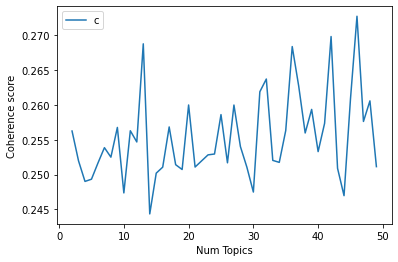

In [37]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [38]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2562
Num Topics = 3  has Coherence Value of 0.252
Num Topics = 4  has Coherence Value of 0.249
Num Topics = 5  has Coherence Value of 0.2493
Num Topics = 6  has Coherence Value of 0.2516
Num Topics = 7  has Coherence Value of 0.2539
Num Topics = 8  has Coherence Value of 0.2525
Num Topics = 9  has Coherence Value of 0.2568
Num Topics = 10  has Coherence Value of 0.2474
Num Topics = 11  has Coherence Value of 0.2563
Num Topics = 12  has Coherence Value of 0.2547
Num Topics = 13  has Coherence Value of 0.2688
Num Topics = 14  has Coherence Value of 0.2444
Num Topics = 15  has Coherence Value of 0.2502
Num Topics = 16  has Coherence Value of 0.2511
Num Topics = 17  has Coherence Value of 0.2568
Num Topics = 18  has Coherence Value of 0.2514
Num Topics = 19  has Coherence Value of 0.2507
Num Topics = 20  has Coherence Value of 0.26
Num Topics = 21  has Coherence Value of 0.2511
Num Topics = 22  has Coherence Value of 0.252
Num Topics = 23  has Coher

In [39]:
# Select the model and print the topics
optimal_model = model_list[37]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(9,
  '0.011*"private" + 0.009*"level" + 0.008*"government" + 0.007*"question" + 0.007*"example" + 0.007*"role" + 0.007*"turnover" + 0.006*"people" + 0.006*"system" + 0.006*"part"'),
 (37,
  '0.014*"level" + 0.013*"people" + 0.012*"government" + 0.012*"thing" + 0.011*"hospital" + 0.009*"service" + 0.008*"project" + 0.008*"health" + 0.008*"different" + 0.008*"partnership"'),
 (33,
  '0.017*"project" + 0.017*"people" + 0.016*"service" + 0.015*"government" + 0.014*"private" + 0.013*"health" + 0.012*"partner" + 0.010*"sector" + 0.009*"good" + 0.008*"hospital"'),
 (27,
  '0.018*"model" + 0.014*"country" + 0.014*"private" + 0.013*"service" + 0.011*"level" + 0.010*"good" + 0.009*"government" + 0.008*"people" + 0.008*"study" + 0.008*"sample"'),
 (4,
  '0.024*"private" + 0.020*"government" + 0.019*"service" + 0.012*"sector" + 0.011*"people" + 0.011*"public" + 0.010*"model" + 0.009*"investment" + 0.008*"study" + 0.008*"level"'),
 (15,
  '0.018*"project" + 0.015*"study" + 0.015*"feasibility" + 0

In [40]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, doc_term_matrix, dictionary)
vis

/home/longin/.local/lib/python3.10/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
18     0.064426 -0.004311       1        1  23.140255
17     0.067196  0.016441       2        1  14.065815
14     0.070541 -0.001104       3        1  13.887171
19     0.058324  0.030349       4        1   7.799507
11     0.073542  0.006381       5        1   7.524727
16     0.068623  0.005095       6        1   7.490887
13     0.060757 -0.012695       7        1   4.000922
38     0.066522  0.051415       8        1   3.572753
7      0.050550  0.011143       9        1   3.441837
29     0.047406 -0.053104      10        1   2.950772
20     0.032018 -0.081389      11        1   2.014463
4      0.044232  0.033688      12        1   1.705933
0      0.040561 -0.060298      13        1   1.632180
32     0.022199  0.030149      14        1   1.397127
5      0.027815  0.023828      15        1   0.877549
26     0.046129 -0.006049      16        1   0.760648
33     0.031776 -0.038256      17        1   0.753624
30     0.040684 -0.001182      18        1   0.704357
25     0.044175  0.003328      19        1   0.510663
24    -0.005991 -0.020794      20        1   0.339692
36    -0.046766  0.012656      21        1   0.257172
22    -0.155386  0.017503      22        1   0.248050
15    -0.011959  0.034534      23        1   0.244292
1      0.034079  0.018776      24        1   0.151584
23    -0.091104 -0.000692      25        1   0.149186
28     0.000143 -0.032398      26        1   0.120791
12     0.007987 -0.001448      27        1   0.088257
9     -0.085391  0.026147      28        1   0.014149
21    -0.126905  0.007041      29        1   0.014149
27    -0.015374 -0.004809      30        1   0.014149
2     -0.154556 -0.003340      31        1   0.014149
3      0.006974  0.014943      32        1   0.014149
31    -0.016336  0.016088      33        1   0.014149
6     -0.012569 -0.004952      34        1   0.014149
34     0.014915  0.001203      35        1   0.014149
35    -0.142990 -0.004321      36        1   0.014149
10    -0.048184  0.022959      37        1   0.014149
37    -0.023855  0.019644      38        1   0.014149
8     -0.084206 -0.072170      39        1   0.014149, topic_info=           Term        Freq       Total Category  logprob  loglift
172     private  262.000000  262.000000  Default  30.0000  30.0000
78   government  272.000000  272.000000  Default  29.0000  29.0000
203     service  215.000000  215.000000  Default  28.0000  28.0000
155      people  182.000000  182.000000  Default  27.0000  27.0000
82       health  182.000000  182.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
151     partner    0.008648  125.017866  Topic39  -5.4195  -0.7156
234       thing    0.008535  127.726953  Topic39  -5.4326  -0.7502
51    different    0.008226  107.471047  Topic39  -5.4695  -0.6143
95     investor    0.007406   51.721389  Topic39  -5.5745   0.0120
102  laboratory    0.007268  121.750130  Topic39  -5.5933  -0.8630

[2706 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
536       1  0.320565  ability
536       2  0.106855  ability
536       3  0.106855  ability
536       4  0.106855  ability
536       5  0.213710  ability
...     ...       ...      ...
257      11  0.060249     year
257      14  0.020083     year
1954      6  0.698358   yearâ€
724       1  0.243965        ™
724       3  0.243965        ™

[3245 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[19, 18, 15, 20, 12, 17, 14, 39, 8, 30, 21, 5, 1, 33, 6, 27, 34, 31, 26, 25, 37, 23, 16, 2, 24, 29, 13, 10, 22, 28, 3, 4, 32, 7, 35, 36, 11, 38, 9])

# Word2vec Training

In [41]:
# pre-processing anad tokizine 
response_text = df_w2vec.Responses.apply(gensim.utils.simple_preprocess)
response_text

0     [attitude, happiness, head, biomedical, servic...
1     [heard, chai, came, project, expand, considere...
2     [attitude, shaking, head, contract, contract, ...
3     [sureness, attitude, rwanda, everything, provi...
4     [sureness, attitude, negotiation, anybody, par...
                            ...                        
72    [think, would, defer, investment, court, sure,...
74    [think, health, sensitive, sector, think, pred...
75    [would, based, findings, feasibility, study, i...
76    [think, would, informed, still, feasibility, s...
79    [yeah, actually, first, time, participate, any...
Name: Responses, Length: 77, dtype: object

Train the model for reviews. Use a window of size 10 i.e. 10 words before the present word and 10 words ahead. A sentence with at least 2 words should only be considered, configure this using min_count parameter.

Workers define how many CPU threads to be used.

In [42]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4,
)

# Build Vocabulary

In [43]:
model.build_vocab(response_text, progress_per=1000)

Train the Word2Vec Model

In [44]:
model.train(response_text, total_examples=model.corpus_count, epochs=model.epochs)

(103773, 128355)

In [45]:
model.save("./word2vec-amazon-cell-accessories-reviews-short.model")

In [46]:
model.wv.most_similar("test")

[('first', 0.9998346567153931),
 ('good', 0.9998325705528259),
 ('like', 0.9998286366462708),
 ('know', 0.9998268485069275),
 ('also', 0.9998254776000977),
 ('thats', 0.9998207688331604),
 ('many', 0.9998206496238708),
 ('maybe', 0.9998186826705933),
 ('think', 0.9998183846473694),
 ('work', 0.9998178482055664)]

# similarity 

In [47]:
dataset['Transcripts'].tail(20)


733    rwa-int-pe_2022_2_1
734    rwa-int-pe_2022_2_1
735    rwa-int-pe_2022_2_1
736    rwa-int-pe_2022_2_1
737    rwa-int-pe_2022_2_1
738    rwa-int-pe_2022_2_1
739    rwa-int-pe_2022_2_1
740    rwa-int-pe_2022_2_1
741    rwa-int-pe_2022_2_1
742    rwa-int-pe_2022_2_1
743    rwa-int-pe_2022_2_1
744    rwa-int-pe_2022_2_1
745    rwa-int-pe_2022_2_1
746    rwa-int-pe_2022_2_1
747    rwa-int-pe_2022_2_1
748    rwa-int-pe_2022_2_1
749    rwa-int-pe_2022_2_1
750    rwa-int-pe_2022_2_1
751    rwa-int-pe_2022_2_1
752    rwa-int-pe_2022_2_1
Name: Transcripts, dtype: object

In [48]:

target_sentence = dataset[(dataset['Transcripts']=='rwa-int-pe-2021-10-26-fi' )& (dataset['Question number']==5)]
target_sentence=str(target_sentence.Responses)
sentences = dataset[(dataset['Transcripts']=='rwa-int-pe_2022_2_1' )& (dataset['Question number']==5)]
sentences=str(sentences.Responses)

In [49]:
w2v_vocab = set(model.wv.index_to_key)
# use n_similarity to compute a cosine similarity (should be reasonably robust)

# Show the target phrase and the most-similar target phrases


In [50]:
#sentences_similarity = np.zeros(len(sentences))

target_sentence_words = [w for w in target_sentence.split() if w in w2v_vocab]

sentence_words = [w for w in sentences.split() if w in w2v_vocab]
sim = model.wv.n_similarity(target_sentence_words, sentence_words)
sim   

0.99954134